In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import random
from utile import *

In [2]:
dataset = pd.read_csv('creditcard.csv')

In [3]:
column_names = dataset.columns.tolist()
print(column_names)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [4]:
#Looking at the main statistics
print(dataset.describe())
stats_df = dataset.describe()
stats_df.loc['skewness'] = dataset.skew()
stats_df.loc['kurtosis'] = dataset.kurt()
stats_df.loc['median'] = dataset.median()
print(stats_df)

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [5]:
#Load and print the first 20 observations of the dataset.
head_20 = dataset.head(20)
print(head_20)

    Time        V1        V2        V3        V4        V5        V6  \
0    0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1    0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2    1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3    1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4    2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
5    2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728   
6    4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708   
7    7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118   
8    7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818   
9    9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761   
10  10.0  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152   
11  10.0  0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027   
12  10.0  1.249999 -1.221637  0.383930 -1.234899 -1.485419 -0.75

In [6]:
#Checking the type of the data
datatype = dataset.dtypes
print(datatype)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [7]:
print(dataset.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


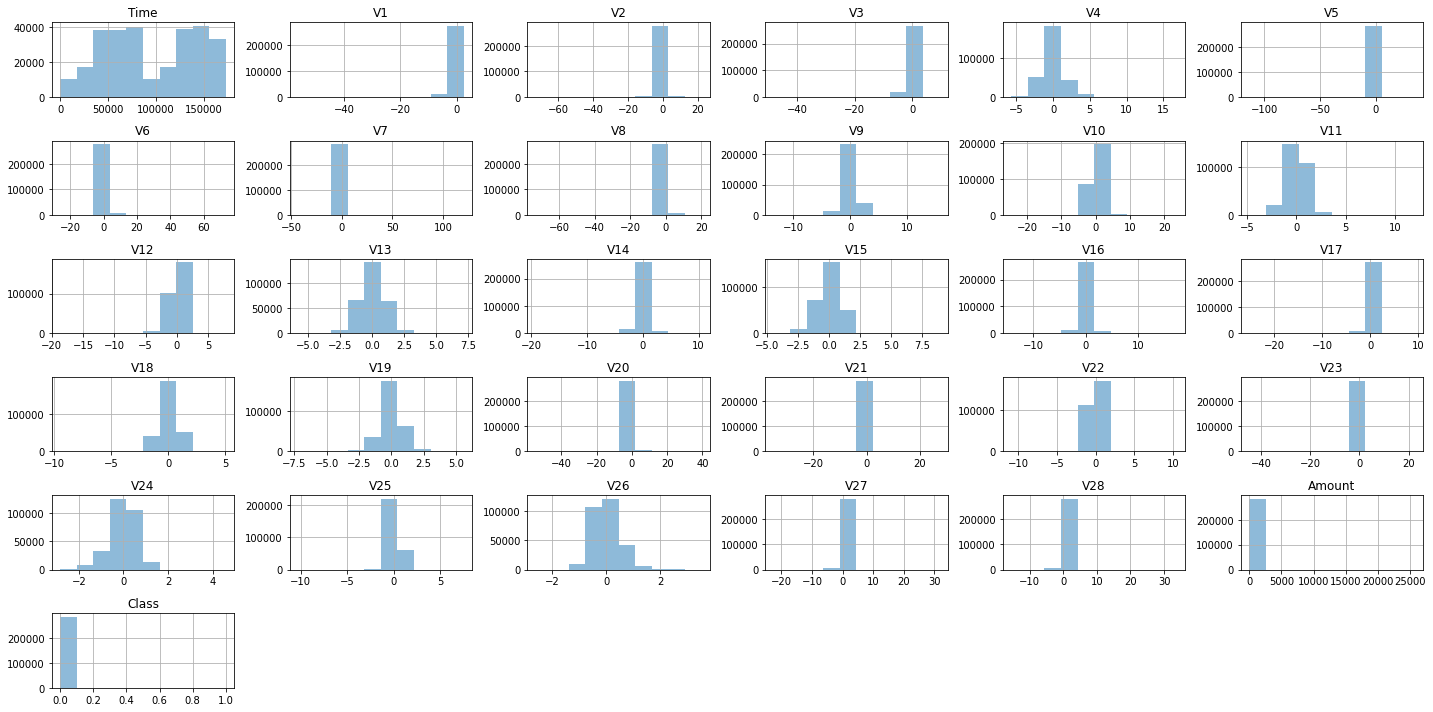

In [8]:
#Histograms
dataset.hist(alpha=0.5, figsize=(20, 10))
plt.tight_layout()
plt.show()

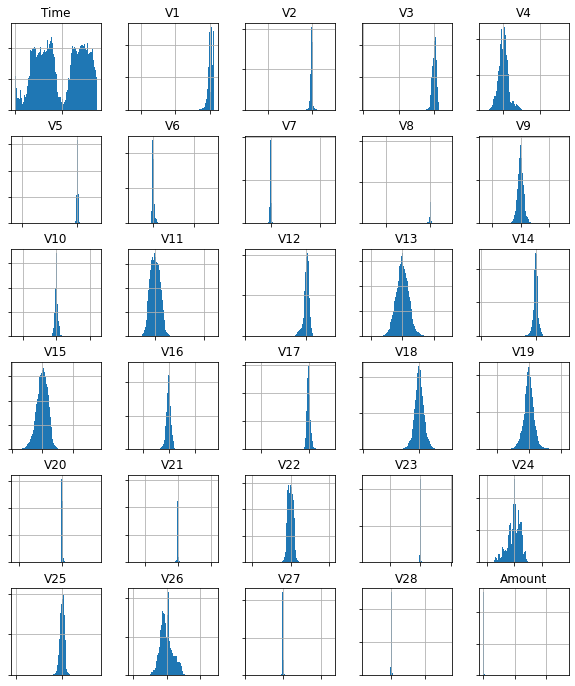

In [9]:
ax = dataset.drop("Class", axis=1).hist(figsize=(10,12),bins=100)
# We hide the axes' labels to make the plot neater and more compact
for axis in ax.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])

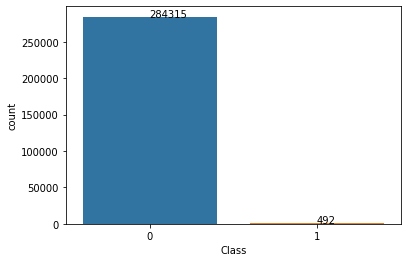

In [10]:
fig,ax = plt.subplots()
sns.countplot(x=dataset.Class,ax=ax)
for p in ax.patches:
        val = p.get_height() #height of the bar
        x = p.get_x() + p.get_width()/2 # x- position 
        y = p.get_y() + p.get_height() #y-position
        ax.annotate(val,(x,y))

In [11]:
from datetime import datetime, timedelta

# extract hour from the timestamp column to create an time_hour column
dataset['Time'] = pd.to_datetime(dataset['Time'], unit="s")

In [12]:
dataset['Time'].head()

0   1970-01-01 00:00:00
1   1970-01-01 00:00:00
2   1970-01-01 00:00:01
3   1970-01-01 00:00:01
4   1970-01-01 00:00:02
Name: Time, dtype: datetime64[ns]

In [13]:
dataset['Time'].tail()

284802   1970-01-02 23:59:46
284803   1970-01-02 23:59:47
284804   1970-01-02 23:59:48
284805   1970-01-02 23:59:48
284806   1970-01-02 23:59:52
Name: Time, dtype: datetime64[ns]

In [14]:
dataset["Hour"] = dataset['Time'].dt.hour

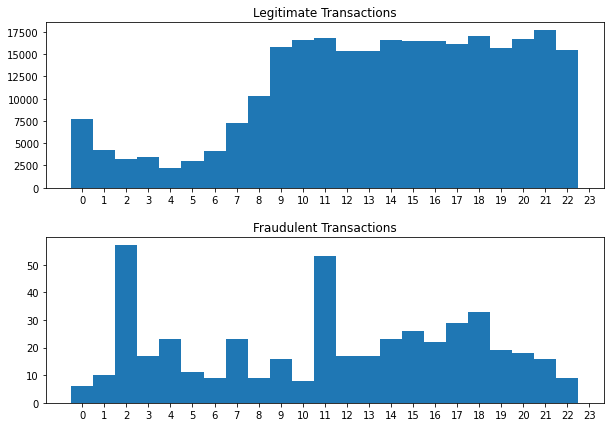

In [15]:
fig, ax = plt.subplots(2, figsize=(10,7))
for a in ax:
    a.set_xticks(range(24))
dataset.loc[dataset["Class"] == 0]["Hour"].hist(bins=np.arange(24)-0.5, ax=ax[0], grid=False)
dataset.loc[dataset["Class"] == 1]["Hour"].hist(bins=np.arange(24)-0.5, ax=ax[1], grid=False)
ax[0].title.set_text("Legitimate Transactions")
ax[1].title.set_text("Fraudulent Transactions")
plt.subplots_adjust(hspace=0.3)

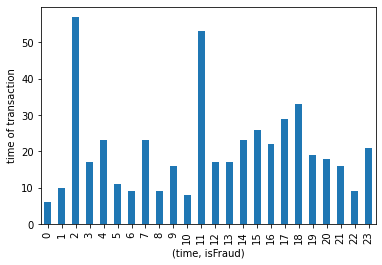

In [16]:
fraud = dataset['Class'].isin([1])

fraud_time = dataset[fraud].groupby(['Hour']).size().plot(kind='bar')
fraud_time.set_xlabel("(time, isFraud)")
fraud_time.set_ylabel("time of transaction")
plt.show()

In [17]:
from sklearn.model_selection import train_test_split


trainDF, testDF = train_test_split(dataset, test_size=0.2, random_state=1234, stratify=dataset[["Class"]])

trainDF_norm = trainDF.copy()
trainDF_norm["Amount"] = trainDF["Amount"].subtract(trainDF["Amount"].mean())
trainDF_norm["Hour"] = trainDF["Hour"].subtract(trainDF["Hour"].mean())

testDF_norm = testDF.copy()

testDF_norm["Amount"] = testDF["Amount"].subtract(testDF["Amount"].mean())
testDF_norm["Hour"] = testDF["Hour"].subtract(testDF["Hour"].mean())

trainDF = trainDF_norm
testDF = testDF_norm
tr_value_counts = trainDF["Class"].value_counts()
print("Fraudulent transactions are %.2f%% of the training set." % (tr_value_counts[1] * 100 / len(trainDF)))
tst_value_counts = testDF["Class"].value_counts()
print("Fraudulent transactions are %.2f%% of the test set." % (tst_value_counts[1] * 100 / len(testDF)))

Fraudulent transactions are 0.17% of the training set.
Fraudulent transactions are 0.17% of the test set.


In [18]:
trainDF_norm["Amount"] = trainDF["Amount"].subtract(trainDF["Amount"].mean())
trainDF_norm["Hour"] = trainDF["Hour"].subtract(trainDF["Hour"].mean())

testDF_norm["Amount"] = testDF["Amount"].subtract(testDF["Amount"].mean())
testDF_norm["Hour"] = testDF["Hour"].subtract(testDF["Hour"].mean())
trainDF = trainDF_normtestDF = testDF_norm

In [19]:
trainDF = trainDF.drop(["Time"], axis=1)
testDF = testDF.drop(["Time"], axis=1)

In [20]:
X_train = trainDF.iloc[:, trainDF.columns != "Class"]
y_train = trainDF.iloc[:, trainDF.columns == "Class"]
X_test = testDF.iloc[:, testDF.columns != "Class"]
y_test = testDF.iloc[:, testDF.columns == "Class"]
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hour
38607,-0.881164,-0.537194,2.479497,0.944675,-1.578208,1.136568,-0.043735,0.397746,-1.460387,0.527312,...,0.052055,0.355153,0.327118,0.183838,0.044737,0.022493,0.109542,0.109897,136.782587,-4.017257
113302,-0.885404,0.403891,0.730598,-1.655171,2.732323,3.410628,0.233018,0.713919,-0.353257,-0.455123,...,-0.258158,-0.904623,-0.220187,0.984244,0.270677,-0.002165,-0.295257,-0.141850,-68.747413,5.982743
154210,1.936180,-0.559750,0.134698,0.385497,-0.871716,0.106497,-1.156510,0.186510,2.570330,-0.202706,...,-0.087873,0.067471,0.291651,-0.454241,-0.656385,0.451330,-0.047002,-0.059189,-73.797413,-10.017257
183158,1.936207,-0.254931,-1.408383,-0.009918,0.820452,0.921576,-0.157472,0.265727,0.294221,0.105333,...,-0.196572,-0.352925,0.331705,-1.627373,-0.453666,0.309517,-0.024677,-0.086909,-86.767413,-4.017257
212422,0.207577,0.305463,0.638783,-0.459451,0.024812,0.043566,0.370522,-0.286907,-1.699743,1.237403,...,0.099169,0.402490,-0.207907,0.786499,-0.304110,0.085865,-0.152691,-0.097177,-73.747413,-0.017257


In [21]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [22]:
from imblearn.over_sampling import SMOTE
X_train_sm, y_train_sm = SMOTE(random_state=1234).fit_resample(X_train_scaled, y_train)
smote_value_counts = y_train_sm["Class"].value_counts()

In [23]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=None)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

## Model Development

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight="balanced")
lr_model = lr.fit(X_train_sm, y_train_sm)

c:\Users\xps\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\xps\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
print(lr.score(X_test, y_test))

0.7812401249956111


In [26]:
y_pred_lr = lr_model.predict(X_test)

In [27]:
from sklearn.metrics import classification_report

print("Classification Report:\n\n", classification_report(y_test, y_pred_lr))

Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.78      0.88     56864
           1       0.00      0.32      0.00        98

    accuracy                           0.78     56962
   macro avg       0.50      0.55      0.44     56962
weighted avg       1.00      0.78      0.88     56962



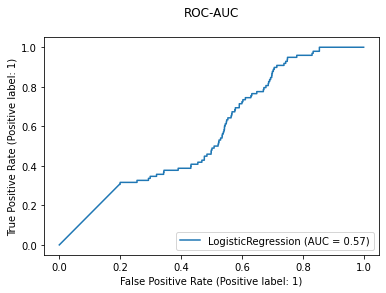

In [28]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(lr_model, X_test, y_test)
plt.title('ROC-AUC\n')
plt.show()

c:\Users\xps\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


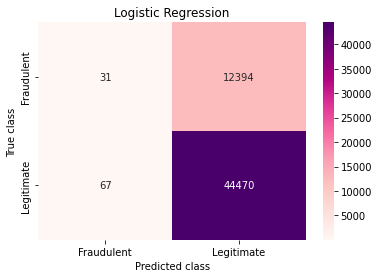

 The result is telling us that we have:  44501 correct predictions
 We have:  12461 incorrect predictions
 And a total predictions of:  56962


In [30]:
from utile import *
confusionMatrix(y_pred_lr, y_test, "Logistic Regression")

## XGBOOST Model

In [31]:
import random

rows = random.sample(np.arange(0,len(X_train_smote.index)).tolist(), 5000)
model_params = xgboost_search(X_train_smote.iloc[rows,], y_train_smote.iloc[rows,])

Fitting 3 folds for each of 960 candidates, totalling 2880 fits
Best estimator: 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, eval_metric='auc', gamma=0.5, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=100, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1.0, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)
Parameters:  {'colsample_bytree': 0.5, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 100, 'subsample': 1.0}
Highest AUC: 1.00


In [32]:
import xgboost

m2_xgb = xgboost.XGBClassifier().set_params(**model_params)

In [33]:
m2_xgb.fit(X_train_smote, y_train_smote, eval_metric="auc", verbose = False, eval_set=[(X_train_smote, y_train_smote)])

c:\Users\xps\AppData\Local\Programs\Python\Python36\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\xps\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.5, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=100, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1.0, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [34]:
y_predicted_xgb = m2_xgb.predict(X_test)

In [35]:
from sklearn.metrics import classification_report


print("Classification Report:\n\n", classification_report(y_test, y_predicted_xgb))

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.40      1.00      0.58        98

    accuracy                           1.00     56962
   macro avg       0.70      1.00      0.79     56962
weighted avg       1.00      1.00      1.00     56962



c:\Users\xps\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


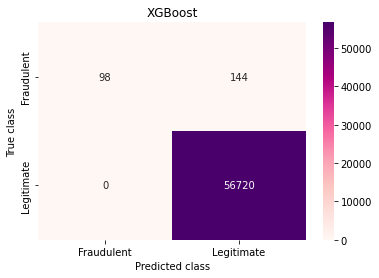

 The result is telling us that we have:  56818 correct predictions
 We have:  144 incorrect predictions
 And a total predictions of:  56962


In [36]:
confusionMatrix(y_predicted_xgb, y_test, "XGBoost")

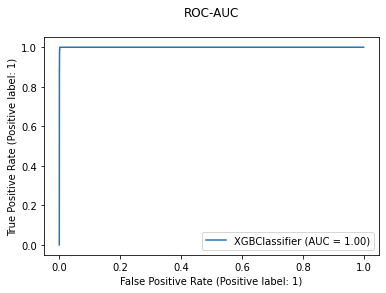

In [37]:
from sklearn.metrics import plot_roc_curve


plot_roc_curve(m2_xgb, X_test, y_test)
plt.title('ROC-AUC\n')
plt.show()